### Data Analysis

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# Load the dataset
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [68]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df.describe() 

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


1. Data Cleaning:  
 - Handle missing values and duplicates  
 - Ensure correct data types (e.g., Age as numeric) 

In [ ]:
df_clean = df.dropna()
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)
df_clean['age'] = df_clean['Age'].astype(float)
df_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age
0,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,28.0
1,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,28.0
2,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,28.0
3,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,28.0
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,28.0


In [71]:
df_clean.columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30181 entries, 0 to 30180
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
 15  age     30181 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 3.7+ MB


2. Exploratory Analysis:  
 - How many athletes participated over the years?  
- Top 10 countries with the most medals  
 - Which sports have the most events and medals?  

In [72]:
# How many athletes participated over the years?  
athletes_per_year = df_clean.groupby('Year')['ID'].nunique()
athletes_per_year

Year
1896       9
1900      20
1904      34
1906      45
1908     106
1912     103
1920     150
1924     158
1928     154
1932     151
1936     179
1948     163
1952     266
1956     508
1960     859
1964    1042
1968    1080
1972    1227
1976    1334
1980    1413
1984    1484
1988    1593
1992    1629
1994     266
1996    1572
1998     380
2000    1828
2002     406
2004    1835
2006     443
2008    1860
2010     436
2012    1746
2014     475
2016    1846
Name: ID, dtype: int64

In [73]:
# - Top 10 countries with the most medals  
top_countries = df_clean.groupby('NOC')['Medal'].count().nlargest(10)
print("Top 10 countries with the most medals:")
print(top_countries)


Top 10 countries with the most medals:
NOC
USA    4383
URS    2246
GER    1612
AUS    1206
RUS    1134
CAN    1060
ITA    1060
GBR    1031
GDR     995
FRA     987
Name: Medal, dtype: int64


In [74]:
# - Which sports have the most events and medals?  
sports_events = df_clean.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
sports_events


Sport
Athletics                    82
Swimming                     43
Cycling                      29
Wrestling                    29
Shooting                     28
Canoeing                     26
Cross Country Skiing         23
Sailing                      22
Weightlifting                21
Rowing                       19
Gymnastics                   19
Boxing                       15
Judo                         15
Speed Skating                13
Biathlon                     13
Fencing                      12
Snowboarding                 12
Equestrianism                11
Freestyle Skiing             10
Alpine Skiing                10
Diving                        9
Short Track Speed Skating     8
Taekwondo                     8
Tennis                        6
Table Tennis                  6
Badminton                     5
Figure Skating                5
Nordic Combined               5
Archery                       4
Luge                          4
Ski Jumping                   4
Mo

In [75]:
# - medal counts per sport
medal_counts = df_clean.groupby('Sport')['Medal'].count().sort_values(ascending=False)
medal_counts

Sport
Athletics                    3648
Swimming                     2486
Rowing                       2104
Ice Hockey                   1301
Hockey                       1168
Gymnastics                   1161
Fencing                      1109
Football                     1084
Canoeing                     1041
Basketball                   1000
Wrestling                     967
Volleyball                    958
Handball                      937
Cycling                       845
Water Polo                    764
Boxing                        708
Cross Country Skiing          687
Sailing                       677
Equestrianism                 663
Shooting                      542
Weightlifting                 532
Judo                          526
Speed Skating                 488
Biathlon                      388
Alpine Skiing                 354
Baseball                      333
Diving                        318
Bobsleigh                     283
Short Track Speed Skating     274
Figure S

3. Statistical Insights with NumPy:  
 - Calculate average and range of athlete ages  - 
Number of unique sports, events, and countries 

In [76]:
#  - Calculate average and range of athlete ages  - 
merge_ages = df_clean.groupby('Year')['age'].agg(['mean', 'min', 'max'])
merge_ages = merge_ages.rename(columns={'mean': 'Average Age', 'min': 'Min Age', 'max': 'Max Age'})
merge_ages

,Average Age,Min Age,Max Age
Year,,,
1896,23.050000,20.0,27.0
1900,23.631579,18.0,32.0
1904,23.711864,19.0,40.0
1906,26.231884,20.0,52.0
1908,24.395522,16.0,41.0
1912,24.076923,18.0,45.0
1920,25.587912,17.0,58.0
1924,25.481081,16.0,48.0
1928,24.529412,15.0,43.0


In [77]:
# Number of unique sports, events, and countries 
unique_sports = df_clean['Sport'].nunique()
unique_events = df_clean['Event'].nunique()
unique_countries = df_clean['NOC'].nunique()
summary_stats = {
    'Unique Sports': unique_sports,
    'Unique Events': unique_events,
    'Unique Countries': unique_countries
}
summary_stats

{'Unique Sports': 55, 'Unique Events': 562, 'Unique Countries': 143}

4. Pandas Analysis:  
 - Group medal counts by country, sport, and year  
- Find the athlete with the most medals  
 - Track gender participation over time  

In [ ]:
# Group medal counts by country, sport, and year
medal_counts_by_country = df_clean.groupby(['NOC', 'Sport', 'Year'])['Medal'].count().reset_index()
top_athlete = df_clean.groupby('Name')['Medal'].count().sort_values(ascending=False).head(1)

Athlete name: Michael Fred Phelps, II
Total medals: 28
Age: 19.0
Country: USA
Sport: Swimming
Height: 193.0 cm
Weight: 91.0 kg

gender_participation over the years:


Sex,F,M
Year,,
1896,NaN,9.0
1900,NaN,20.0
1904,NaN,34.0
1906,NaN,45.0
1908,NaN,106.0
1912,NaN,103.0
1920,1.0,149.0
1924,2.0,156.0
1928,17.0,137.0


In [ ]:
# information about the top athlete
top_athlete_name = top_athlete.index[0]
top_athlete_info = df_clean[df_clean['Name'] == top_athlete_name].iloc[0]

print(f"Athlete name: {top_athlete_name}")
print(f"Total medals: {top_athlete.iloc[0]}")
print(f"Age: {top_athlete_info['Age']}")
print(f"Country: {top_athlete_info['NOC']}")
print(f"Sport: {top_athlete_info['Sport']}")
print(f"Height: {top_athlete_info['Height']} cm")
print(f"Weight: {top_athlete_info['Weight']} kg")

Athlete name: Michael Fred Phelps, II
Total medals: 28
Age: 19.0
Country: USA
Sport: Swimming
Height: 193.0 cm
Weight: 91.0 kg


In [83]:
# Track gender participation over time
gender_participation = df_clean.groupby(['Year', 'Sex'])['ID'].nunique().unstack()
print("\ngender_participation over the years:")
gender_participation


gender_participation over the years:


Sex,F,M
Year,,
1896,NaN,9.0
1900,NaN,20.0
1904,NaN,34.0
1906,NaN,45.0
1908,NaN,106.0
1912,NaN,103.0
1920,1.0,149.0
1924,2.0,156.0
1928,17.0,137.0


5. Bonus (Optional):  
 - Visualize trends using matplotlib or seaborn  - Identify 
emerging sports or declining sports in Olympics 

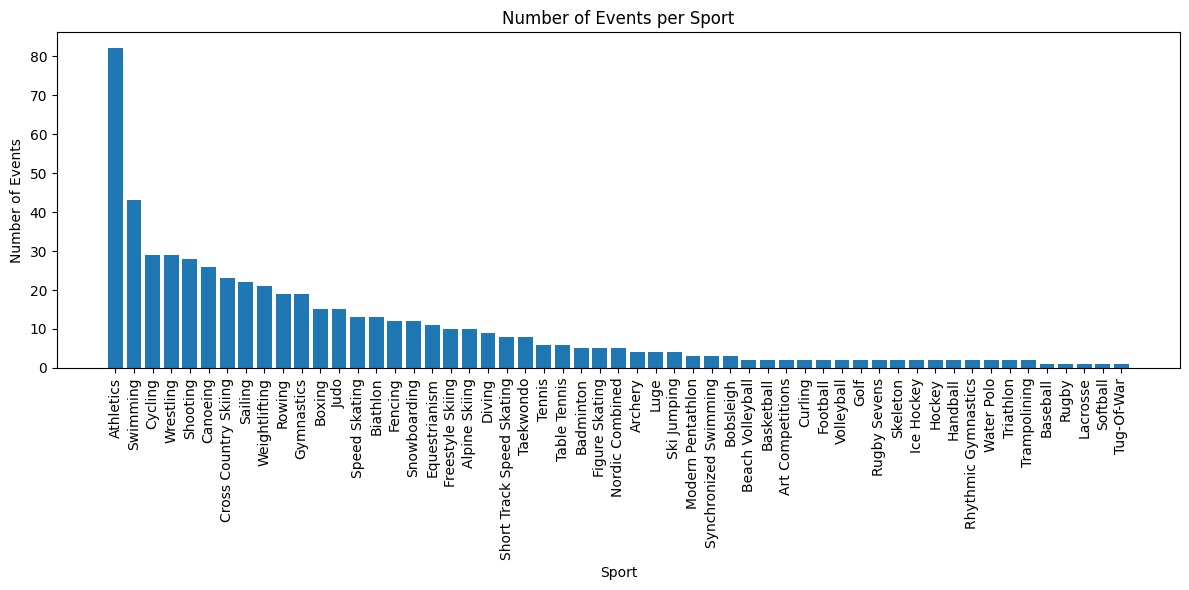

In [79]:
# using matpltlib to visualize emerging sports
plt.figure(figsize=(12, 6))
plt.bar(sports_events.index, sports_events.values) #type: ignore
plt.title('Number of Events per Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

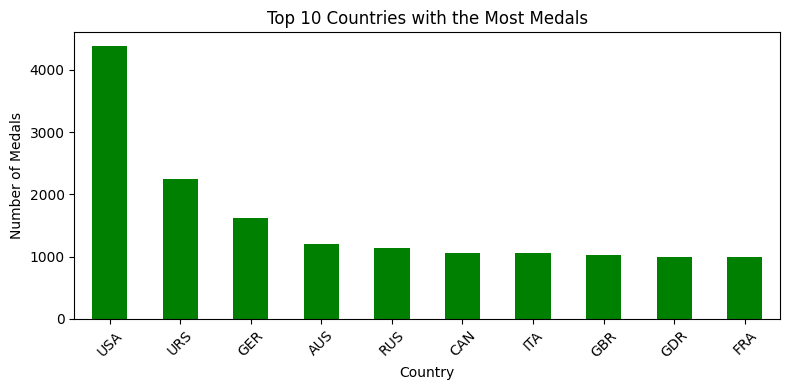

In [88]:
# matplotlib to visualize the top 10 countries with the most medals
plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

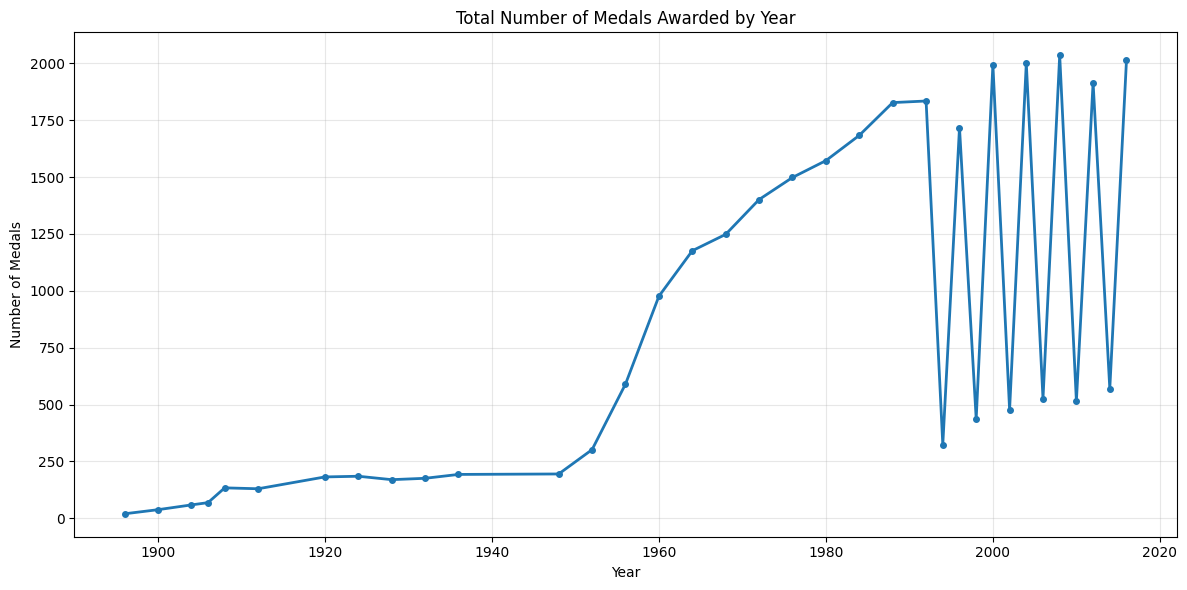

In [81]:
# Create medal counts by year
medal_year = df_clean.groupby('Year')['Medal'].count()

# Create the line plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(medal_year.index, medal_year.values, marker='o', linewidth=2, markersize=4) #type: ignore
plt.title("Total Number of Medals Awarded by Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

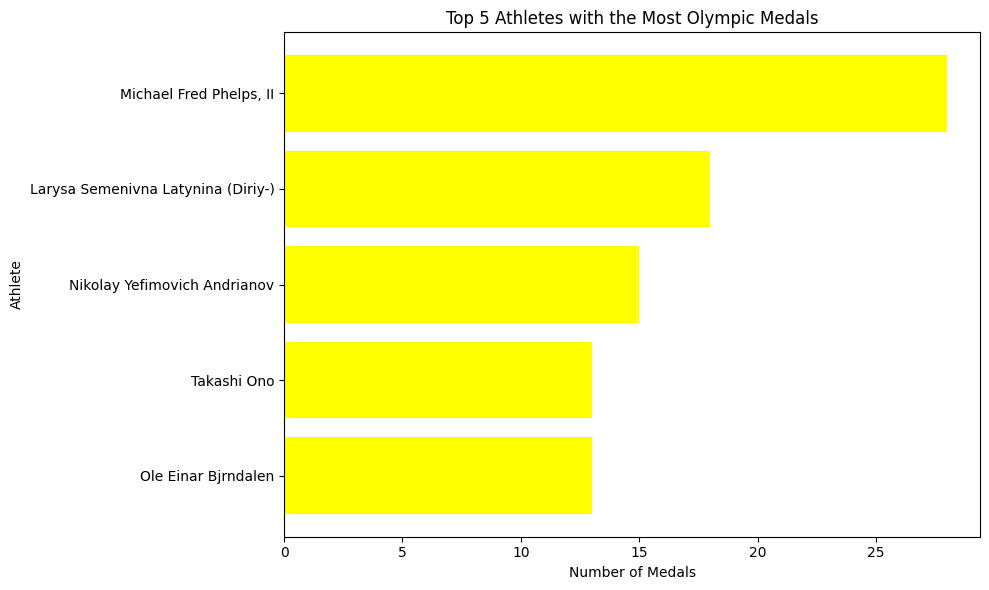

In [90]:
# Top 5 Athletes with the Most Olympic Medals
df_medals = df_clean[df_clean["Medal"].notna()]

top_athletes = df_medals["Name"].value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_athletes.index, top_athletes.values, color='yellow') #type: ignore
plt.title("Top 5 Athletes with the Most Olympic Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Athlete")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()